<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Ryan Wills

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

#### Answer:
P(S) = probability you pick a 6-sided die = $\frac{10}{40}$  
P(S5) = probability you roll a 5 from a 6-sided die = $\frac{1}{6}$  

P(T) = probability you pick a 20-sided die = $\frac{2}{40}$  
P(T5) = probability you roll a 5 from a 20-sided die = $\frac{1}{20}$  

P(F) = probability you pick a 4-sided die = $\frac{28}{40}$  
P(F5) = probability you roll a 5 froma a 4-sided die = $\frac{0}{4}$

P(S)P(S5) + P(T)P(T5) +P(F)P(F5) = ($\frac{10}{40}$)($\frac{1}{6}$) + ($\frac{2}{40}$)($\frac{1}{20}$) + ($\frac{28}{40}$)($\frac{0}{4}$) = 0.0442

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

#### Answer:
P(*R*<sub>5</sub>) = 0.0442  
P(S$\cap R_5$) = $(\frac{1}{4})(\frac{1}{6}) = \frac{1}{24}$ = 0.0416

Using conditional probability, P(*S*|*R*<sub>5</sub>) = $\frac{P(S \cap R_5 )}{P(R_5)}$ = $\frac{0.0416}{0.0442}$ = 0.9412

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

#### Answer:
The event *R*<sub>5</sub> would be independent of *S* if P(*S*|*R*<sub>5</sub>) = P(*R*<sub>5</sub>)  
Given our answer from Part B, P(*S*|*R*<sub>5</sub>) = 0.9412  
Given our answer from Part A, *R*<sub>5</sub> = 0.0442  

Therefore, the events are dependent since P(*S*|*R*<sub>5</sub>) $\neq$ *R*<sub>5</sub>

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

#### Answer: 
P(S) = probability you pick a 6-sided die = $\frac{10}{40}$  
P(S1) = probability you roll 1-4 from a 6-sided die = $\frac{4}{6}$  

P(T) = probability you pick a 20-sided die = $\frac{2}{40}$  
P(T1) = probability you roll 1-4 from a 20-sided die = $\frac{4}{20}$  

P(F) = probability you pick a 4-sided die = $\frac{28}{40}$  
P(F1) = probability you roll 1-4 froma a 4-sided die = $\frac{4}{4}$

P(E<sub>1</sub>) = P(S)P(S1) + P(T)P(T1) +P(F)P(F1) = ($\frac{10}{40}$)($\frac{4}{6}$) + ($\frac{2}{40}$)($\frac{4}{20}$) + ($\frac{28}{40}$)($\frac{4}{4}$) =0.876    

$\frac{P(E_1|F)P(F)}{P(E_1)} = \frac{(\frac{4}{4})(\frac{28}{40})}{0.876}$ = 0.7991

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

For part D, we were using to formula: $\frac{P(E_1|F)P(F)}{P(E_1)}$, which gave us the answer after one roll. But we need to figure out for *n* rolls.  

$\frac{P(E_1|F)P(F)}{P(E_1)} = \frac{(\frac{4}{4})(\frac{28}{40})}{(\frac{10}{40})(\frac{4}{6}) + (\frac{2}{40})(\frac{4}{20}) + (\frac{28}{40})(\frac{4}{4})}$  This formula is for one roll, but if we want to do multiple rolls, we will need to multiply the probability of rolling 1, 2, 3, or 4 for each die and roll.  
So our formula will look like this: $\frac{P(E_n|F)P(F)}{P(E_n)} = \frac{(\frac{4}{4})^n(\frac{28}{40})}{(\frac{10}{40})(\frac{4}{6})^n + (\frac{2}{40})(\frac{4}{20})^n + (\frac{28}{40})(\frac{4}{4})^n}$

In [44]:
def prob_four(n):
    x = n
    num = 28/40
    denom = (10/40)*(4/6)**n + (2/40)*(4/20)**n + (28/40)
    return(num/denom)
    

In [45]:
prob_four(1)

0.7984790874524715

This is close to my answer in D, I'm assuming it's off a bit because I rounded the denominator.

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [46]:
prob_four(2)

0.860890953812517

In [47]:
prob_four(3)

0.9038391644509058

In [48]:
prob_four(4)

0.9340024326892286

In [50]:
prob_four(5)

0.9550605655503714

It takes *n* of 5 for there to be a greater than 95% chance the die is four-sided.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

#### Answer: 
The probability of going to the Brewing Market from the Engineering Center, P(E->C) = $\frac{1}{4}$. 
From the Brewing Market to the library, P(C->L) = $\frac{1}{3}$    

The other option is that Oscar goes to the Gym from the Engineering Center, P(E->G) = $\frac{1}{4}$. He then goes to the Library from the Gym, P(G->L) = $\frac{1}{4}$  

In summary, if Oscar goes to get coffe first, he has a $\frac{1}{12}$ chance of getting to the library. If he goes to  the gym first he has a $\frac{1}{16}$ chance of getting to the library. Therefore, he has a $\frac{1}{12} + \frac{1}{16} = \frac{7}{48}$ or 0.1458 probability that he ends up at the library after visting a location first.

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

#### Answer:
From the Reservoir, she has first a $\frac{1}{2}$ probability that it will be her first stop. However, she also has a $\frac{1}{2}$ probability of going to the engineering building first, and then a $\frac{1}{4}$ probability of going to the gym second.  
Therefore, she has a $\frac{1}{2} + (\frac{1}{2})(\frac{1}{4}) = \frac{5}{8}$ or 0.625 probability that she ends up at the gym as her first or second choice.

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

#### Answer:
1. If they both go to the gym, Stella has a $\frac{1}{3}$ proability and Oscar has a $\frac{1}{4}$ probability of choosing the gym, so a $\frac{1}{12}$ probability they both choose gym. There is the same probability they both choose library first, and also coffee. Therefore $\frac{1}{12} + \frac{1}{12} + \frac{1}{12} = \frac{3}{12}$  or  $\frac{1}{4}$

2. The different ways that Oscar can get to the hill in two moves are E->G->H, E->L->H, or E->C->H. The path E->G has a $\frac{1}{4}$ proability and from G->H also has a $\frac{1}{4}$ probability for a $\frac{1}{16}$ probability he makes it to the hill via the gym. The path E->L has a $\frac{1}{4}$ probability and from L->H a $\frac{1}{4}$ probability for a $\frac{1}{16}$ probability he goes to the hill via library. If he goes the coffe route, he has a $\frac{1}{4}$ probabilty to go to the coffee shop from engineering center and a $\frac{1}{3}$ probability he goes to the hill from there. This results in a $\frac{1}{12}$ probability of hill via coffee. Adding all of these together, we get a $\frac{5}{24}$ probability he ends up at the hill in two moves if leaving from the engineering center. Stella's options are H->G->H, H->L->H, or H->C->H. Leaving from the hill to any of those locations is $\frac{1}{3}$. If she leaves from the gym or library, she has a $\frac{1}{4}$ probability of going back to the hill. If she leaves from the coffe shop, she has a $\frac{1}{3}$ probability of going back to the hill. The H->G->H and H->L->H paths have a $\frac{1}{12}$ probability each and the H->C->H path has a $\frac{1}{9}$ probabilty. Adding those all together, Stella has a $\frac{5}{18}$ probability of ending back at the hill after two moves. To get the probability of both Stella and Oscar ending up at the hill after two moves, we just multiply their individual probabilities. $(\frac{5}{24})(\frac{5}{18})$ = $\frac{25}{432}$ or 0.0579 probability or about 6% chance they both end up at the hill after 2 moves.

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

#### Answer:
$\Omega$ = {HH, HM, MH, MM, HHHH, HHHM, HHMH, HHMM, MMHH, MMHM, MMMH, MMMM}  
First round:  
HH = Both Tony and Dan's strikes hit, onto the next round  
HM = Tony's strike hits and Dan's misses, Tony wins  
MH = Tony's strike misses and Dan's hits, Dan wins
MM = Both Tony and Dan's strikes miss, onto the next round  

Second round:  
HHHH = Both hits in the first round, both hits in the second round, next round
HHHM = Both hits in the first round, Tony hits and Dan misses, Tony wins
HHMH = Both hits in the first round, Tony misses and Dan hits, Dan wins
HHMM = Both hits in the first round, both miss in the second round, next round
MMHH = Both miss in the first round, both hits in the second round, next round
MMHM = Both miss in the first round, Tony hits and Dan misses, Tony wins
MMMH = Both miss in the first round, Tony misses and Dan hits, Dan wins
MMMM = Both miss in the first round, both miss in the second round, next round

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

#### Answer:
$P(T \mid E)$ = $\frac{P(E \mid T)P(T)}{P(E)}$  
The only event where Tony wins the duel and it was also in the first round is the event where Tony hits (*p*) and Dan does not hit (1-*p*). The probability that the dues ends after the first round are the probability that Tony wins plus the probability that Dan wins. This gives us our final answer of:  
$\frac{p(1-q)}{p(1-q) + q(1-p)}$

**Part C**: Explain why events $C$ and $T$ are independent. 

#### Answer:
*C* and *T* are independent because the duel could go on for a million rounds, and Tony still has the same probability of winning or losing the duel. Equally, if Tony wins the duel, it says nothing about how many rounds the duel went. It could have been one round, or a thousand.

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) ~P(T \mid C)$. 

#### Answer:
The LTP states that $P(A) = P(A \mid B)P(B) + P(A \mid B^C)P(B^C)$  
Rewriting this, to fit the problem, we get $P(T) = P(T \mid C)P(C) + P(T \mid C^C)P(C^C)$
Since *C* is the event that the duel goes longer than one round, the compliment would be *E*, the event that it ends in the first round. 

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

#### Answer:
$P(T) = \frac{p(1-q)}{1-(2pq-p-q+1)} = \frac{p(1-q)}{-2pq+p+q} = \frac{p(1-q)}{p+q-pq-pq} = \frac{p(1-q)}{(p-pq)+(q-pq)} = \frac{p(1-q)}{p(1-q)+q(1-p)}$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

#### Answer:
The answers are the same, because P(T) is independent of P(E).

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

#### Answer:
We did it this way because we did not know precisely $P(T)$ and had to use other things we knew, along with formulas in order to find $P(T)$. These tecniques can always be used, but are not always needed. 

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [199]:
def miniopoly_turn(location, cash):
    die = np.array([1,2,3,4,5,6])
    chance = np.array([-100,-50,50,100,200])
    jail = False
    roll_1 = np.random.choice(die)
    roll_2 = np.random.choice(die)
    total_roll = roll_1 + roll_2

    if jail == False:
        location += total_roll
    elif jail == True:
        if roll_1 == roll_2:
            jail = False
            location += total_roll
        else:
            cash -= 20
    
    if location in [2,7,17,22,33,36]:
        cash += np.random.choice(chance)
    elif location == 30:
        location = 10
        jail = True
        in_jail = 1
    elif location <= 40:
        cash -= location
    else:
        location >= 40
        location -= 40
        cash -= location
        cash += 200
        
    
    if cash <= 0:
        cash = 0
        bankrupt = 1
#         print("Game Over, You are Bankrupt")
    
    
    return location, cash

In [200]:
location = 0
cash = 200
miniopoly_turn(location,cash)

(2, 100)

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

In [203]:
def game(turns):
    location = 0
    cash = 200
    is_bankrupt = 0
    for i in range(turns):
        location, cash = miniopoly_turn(location,cash)
        if cash == 0:
            is_bankrupt = 1 
    return location, cash, is_bankrupt

In [204]:
turns = 30
game(turns)

(38, 754, 0)

In [180]:
def simulation(games, turns):
    total_bankrupt = 0
    cash_list = []
    for i in range(games):
        final_loc, final_cash, is_bankrupt = game(turns)
        total_bankrupt += is_bankrupt
        cash_list.append(final_cash)
    return total_bankrupt, cash_list

(array([   65.,   466.,  1100.,  1303.,  1111.,   593.,   258.,    69.,
           26.,     9.]),
 array([   54. ,   230.2,   406.4,   582.6,   758.8,   935. ,  1111.2,
         1287.4,  1463.6,  1639.8,  1816. ]),
 <a list of 10 Patch objects>)

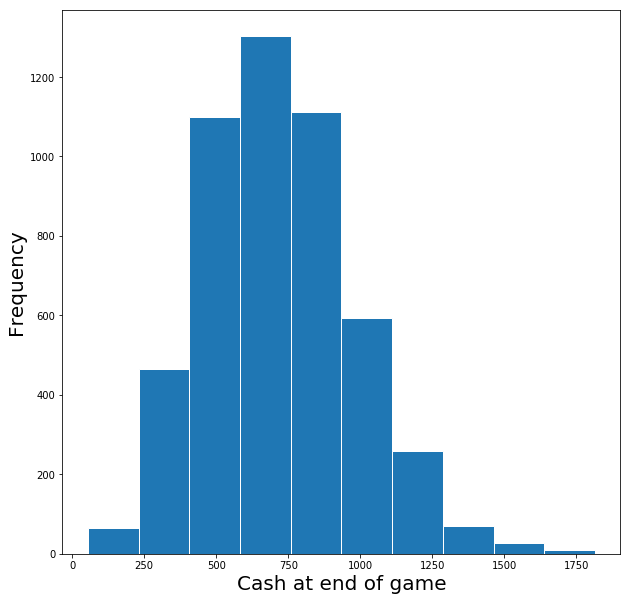

In [189]:
games = 5000
turns = 30
(x,y) = simulation(games, turns)
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel("Cash at end of game")
ax.set_ylabel("Frequency")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.hist(y, edgecolor = 'white')

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [190]:
games = 50000
turns = 30
(x,y) = simulation(games, turns)
prob_bankrupt = x/games
print (prob_bankrupt)

0.08186


The probability that a player goes bankrupt in the first 30 turns based off a simulation of 50,000 games is 0.08186

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


#### Answer:
In order to find $P(C)$ we need to use the law of total probability.  
$P(C) = P(C \mid R_1)P(R_1) + P(C \mid R_2)P(R_2) + P(C \mid R_3)P(R_3) + P(C \mid R_4)P(R_4) + P(C \mid R_5)P(R_5) + P(C \mid R_6)P(R_6)$ 

$P(R_n)$ = the probability that one die rolls *n* where *n* = {1,2,3,4,5,6}
$P(C \mid R_1) = P(C \mid R_6) = \frac{2}{36}$  
$P(C \mid R_2) = P(C \mid R_3) = P(C \mid R_4) = P(C \mid R_5) = \frac{3}{36}$  

$P(C) = \frac{2}{36}\frac{1}{6} + \frac{3}{36}\frac{1}{6} + \frac{3}{36}\frac{1}{6} + \frac{3}{36}\frac{1}{6} + \frac{3}{36}\frac{1}{6} + \frac{2}{36}\frac{1}{6} = 0.074$

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)